# Texte et distance de jaccard

TBD reprendre le tp de la représentation puis ajouter k-means et hiérarchie pour analyse.

## Analyse

**A vous** : 
* faites un MDS en 2 dimension de ces données
* tentez une isomap en changeant le nombre de voisins à prendre en compte
* faites une hiérarchie.

In [ ]:
mds = manifold.Isomap(n_neighbors=2,
                      n_components=2, max_iter=3000,                      
                      metric="precomputed")

pos = mds.fit(d).embedding_

data = pandas.DataFrame(pos)
data.columns=(str(x) for x in data.columns)

In [ ]:

fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x='0', 
                y='1', 
                data=data,
                legend=False,
                ax=ax)
plt.show()

In [92]:
kmeans = KMeans(n_clusters=4,
                n_init=10, 
                max_iter=300).fit(data)

centers = kmeans.cluster_centers_
clusters_kmeans = kmeans.predict(data)

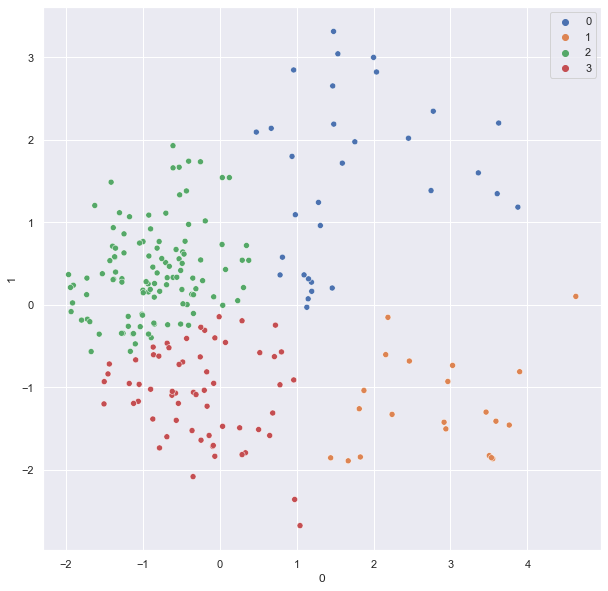

In [93]:
current_palette = sns.color_palette()
colors = {i: current_palette[i] for i in range(len(centers))}

fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x='0', 
                y='1', 
                data=data,
                hue=clusters_kmeans,
                palette=colors,
                ax=ax)

plt.show()

In [ ]:
# petite classe en bas à droite.

numero_classe = 2 # vérifier que c'est bien le bon numéro, il change à chaque lancement

index = []
for i in range(len(elements)):
    if (clusters_kmeans[i] == numero_classe):
        index.append(i)
        print(elements[i])

LA CIGALE ET LA FOURMI.
LE CORBEAU ET LE RENARD.
LES DEUX MULETS.
L’HIRONDELLE ET LES PETITS OISEAUX.
LE DRAGON A PLUSIEURS TÊTES, ET LE DRAGON A PLUSIEURS QUEUES.
LA MORT ET LE MALHEUREUX.
L’HOMME ENTRE DEUX AGES ET SES DEUX MAITRESSES.
LE RENARD ET LA CIGOGNE.
LE COQ ET LA PERLE.
CONSEIL TENU PAR LES RATS.
LA LICE ET SA COMPAGNE.
L’AIGLE ET L’ESCARBOT.
LE LION ET LE MOUCHERON.
LE LIÈVRE ET LES GRENOUILLES.
LE COQ ET LE RENARD.
LE PAON SE PLAIGNANT A JUNON.
LA CHATTE MÉTAMORPHOSÉE EN FEMME.
LE RENARD ET LE BOUC.
L’AIGLE, LA LAIE ET LA CHATTE.
LA GOUTTE ET L’ARAIGNÉE.
LE LOUP ET LA CIGOGNE.
LE CYGNE ET LE CUISINIER.
LES LOUPS ET LES BREBIS.
LE LION DEVENU VIEUX.
LA BELETTE ENTRÉE DANS UN GRENIER.
LE CHAT ET LE VIEUX RAT.
LA MOUCHE ET LA FOURMI.
LE JARDINIER ET SON SEIGNEUR.
L’ANE ET LE PETIT CHIEN.
L’HOMME ET L’IDOLE DE BOIS.
LE CHAMEAU ET LES BATONS FLOTTANTS.
LA GRENOUILLE ET LE RAT.
LE LOUP, LA CHÈVRE ET LE CHEVREAU.
LE VIEILLARD ET SES ENFANTS.
L’ŒIL DU MAITRE.
LE POT DE TERRE ET L

In [95]:
for p in range(len(index)):
    i = index[p]
    for j in index[p+1:]:
        print(elements[i], '-', elements[j])
        print("distance :", d[i][j])
        print("commun :", bag_of_word[elements[i]].intersection(bag_of_word[elements[j]]))

LA CIGALE ET LA FOURMI. - LE CORBEAU ET LE RENARD.
distance : 0.9236641221374046
commun : {'pour', 'tout', 'bien', 'dit', 'cette', 'son', 'que', 'vous', 'pas', 'lui'}
LA CIGALE ET LA FOURMI. - LES DEUX MULETS.
distance : 0.9461538461538461
commun : {'pour', 'dit', 'son', 'quand', 'pas', 'lui', 'est'}
LA CIGALE ET LA FOURMI. - L’HIRONDELLE ET LES PETITS OISEAUX.
distance : 0.919831223628692
commun : {'tout', 'vous', 'elle', 'jusqu', 'grain', 'quelque', 'jour', 'que', 'quand', 'pas', 'est', 'venue', 'saison', 'pour', 'bien', 'dit', 'cette', 'temps', 'fut'}
LA CIGALE ET LA FOURMI. - LE DRAGON A PLUSIEURS TÊTES, ET LE DRAGON A PLUSIEURS QUEUES.
distance : 0.9281437125748503
commun : {'bien', 'jour', 'dit', 'cette', 'son', 'que', 'animal', 'quand', 'seul', 'lui', 'est', 'chez'}
LA CIGALE ET LA FOURMI. - LA MORT ET LE MALHEUREUX.
distance : 0.9
commun : {'quelque', 'tout', 'est', 'dit', 'suis', 'son', 'fut', 'que', 'pas', 'lui', 'venant', 'elle'}
LA CIGALE ET LA FOURMI. - L’HOMME ENTRE DEUX 

### hierarchie

In [96]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

In [97]:
# pas euclidien, donc average linkage et affinity=precomputed

clustering = AgglomerativeClustering(n_clusters=None, 
                                     distance_threshold=0, linkage="average",
                                     affinity="precomputed").fit(d)

In [98]:
fils = clustering.children_
hauteur = clustering.distances_
n = len(clustering.labels_)


node_position = pandas.DataFrame([(0, 0) for i in range(n)], columns=['x', 'y'])

node_position 

pos = [0]
def backtracking(noeud):
    for x in noeud:
        if x < n:
            node_position.loc[x , 'x'] = pos[0]
            pos[0] += 1
        else:
            backtracking(fils[x - n])

backtracking(fils[-1])

for i, (son1, son2) in enumerate(fils):
    pos = 0.5 * (node_position.loc[son1]['x'] + node_position.loc[son2]['x'])
    node_position = pandas.concat([node_position, pandas.DataFrame([(pos, hauteur[i])], columns=['x', 'y'])], ignore_index=True)

In [99]:
import matplotlib.lines as mlines

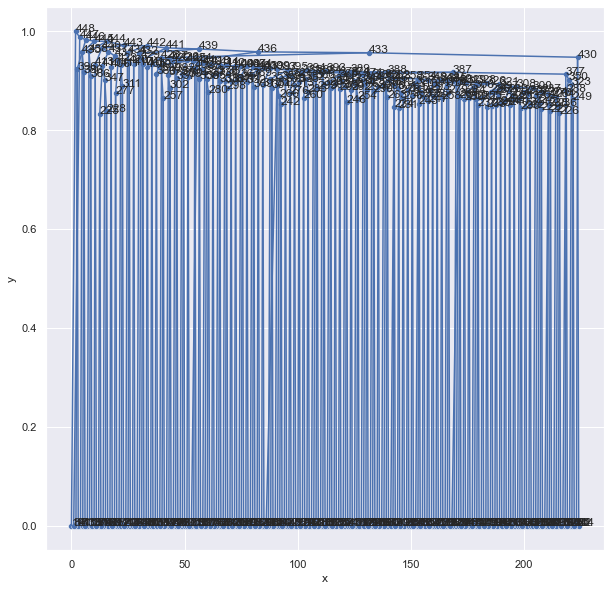

In [100]:
n = len(clustering.labels_)

fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x='x', 
                y='y', 
                data=node_position,
                legend=False,
                ax=ax)

for i, sons in enumerate(fils):
    u = node_position.loc[i + n]    
    v1 = node_position.loc[sons[0]]
    v2 = node_position.loc[sons[1]]
    
    l = mlines.Line2D([u['x'], v1['x']] , [u['y'], v1['y']])
    ax.add_line(l)
    l = mlines.Line2D([u['x'], v2['x']] , [u['y'], v2['y']])
    ax.add_line(l)


for i, row in node_position.iterrows():
    ax.text(row['x'], row['y'], i)
    
plt.show()

On ne peut pas en tirer grand chose. On regarde alors la hauteur d'agrégation pour donner une coupe

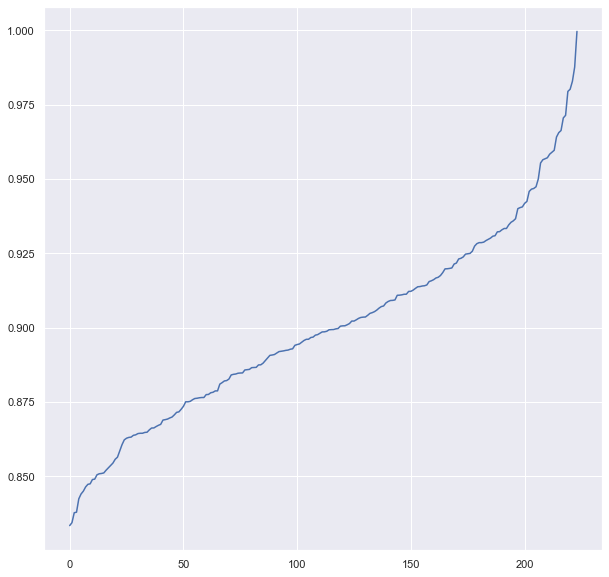

In [101]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.lineplot(x=list(range(len(clustering.distances_))), 
                y=clustering.distances_, 
                legend=False,
                ax=ax)

plt.show()

On peut couper à 0.875 par exemple

### partition d'une hiérarchie

In [102]:
partition = AgglomerativeClustering(n_clusters=None,
                                    compute_full_tree=True,
                                    distance_threshold=0.875,
                                    linkage="average",
                                    affinity="precomputed").fit(d)

In [103]:
partition.labels_

array([116,  13, 137, 141,   7, 144,  17, 146, 119, 172,   6, 115, 123,
       112, 151, 125, 111, 107, 167, 127, 154, 126, 164, 138,  60,   5,
       135, 129,   1, 134, 124,  87, 166,  95,   6, 158, 142, 131, 139,
       108,  22,  93, 117,  60,   2,   5, 133,   3, 173, 140,  89, 136,
        57,  97,  29,  11,  67,  18, 153, 145,   0,  41,  68,   6,   3,
       159, 149,  20,  22,  29, 132,  72,  80, 122,   1, 169,  69,   1,
       102, 128, 163,  98,  13, 143, 103,  39, 155, 147,  86, 161,  23,
        92,  99, 101,   8,   1,  24,  83, 170,   2, 157,  10,  78,  80,
        24, 121,  33, 120,  19,  11,  76,  88,  42,  63,  70,  71, 106,
        55,   9,  62, 162,  26,   4,  19, 118,  20,   0,   0,  42, 105,
        52,  66,  58, 130, 156,  10,   0,  28,  65,   4,  23,  40,  64,
       104,  19, 168, 148,  20,   2,  31,   2, 114,  82,  61,  96,  35,
       160,  94, 152, 100, 110,  75,  83,  84, 150,  82,   1,  51,  91,
        34,  37,   1,   8,  77,  43,  14,  46, 109,  47,   9,  4

In [104]:
from collections import Counter

for cluster, number in Counter(partition.labels_).items():
    if number > 1:
        print(cluster, ":", number,"-", partition.distances_[cluster])

13 : 2 - 0.8507820035827477
7 : 2 - 0.8463414634146341
17 : 2 - 0.852760736196319
6 : 4 - 0.8449197860962567
60 : 2 - 0.8774193548387097
5 : 2 - 0.8439716312056738
1 : 8 - 0.834319526627219
22 : 2 - 0.8584615384615385
2 : 4 - 0.8376623376623377
3 : 2 - 0.8378378378378378
29 : 3 - 0.8638743455497382
11 : 2 - 0.8489632237871674
18 : 2 - 0.8535353535353536
0 : 4 - 0.8333333333333334
41 : 2 - 0.868845753383906
20 : 3 - 0.855649537184807
80 : 2 - 0.886492899920901
39 : 2 - 0.8670826837213564
23 : 2 - 0.8605577689243028
8 : 2 - 0.8472222222222222
24 : 2 - 0.8621908127208481
83 : 2 - 0.8874080361151886
10 : 3 - 0.8488372093023255
19 : 3 - 0.854368932038835
42 : 2 - 0.868995633187773
9 : 2 - 0.8473895582329317
26 : 2 - 0.863013698630137
4 : 5 - 0.8423326133909287
40 : 2 - 0.8674033149171271
82 : 2 - 0.8865979381443299
14 : 2 - 0.8508771929824561
12 : 2 - 0.8504273504273504


Une toute petite classe de 8 éléments :

In [105]:
classe_taille_8 = 1 # vérifier que c'est bien le bon numéro, il change à chaque lanement
index = []
for i in range(len(elements)):
    if (partition.labels_[i] == classe_taille_8):
        index.append(i)
        print(elements[i])

L’AIGLE ET L’ESCARBOT.
LE VIEILLARD ET SES ENFANTS.
L’ŒIL DU MAITRE.
L’AIGLE ET LE HIBOU.
LES DEUX PIGEONS.
LA SOURIS MÉTAMORPHOSÉE EN FILLE.
LES DEUX PERROQUETS, LE ROI ET SON FILS.
LE LION.


In [106]:
for p in range(len(index)):
    i = index[p]
    for j in index[p+1:]:
        print(elements[i], '-', elements[j])
        print("distance :", d[i][j])
        print("commun :", bag_of_word[elements[i]].intersection(bag_of_word[elements[j]]))

L’AIGLE ET L’ESCARBOT. - LE VIEILLARD ET SES ENFANTS.
distance : 0.8736559139784946
commun : {'ses', 'aller', 'grâce', 'point', 'vous', 'fort', 'qui', 'elle', 'enfin', 'tous', 'comme', 'fait', 'autre', 'ces', 'seul', 'second', 'avoit', 'aux', 'mais', 'rencontre', 'dans', 'tort', 'que', 'moi', 'leur', 'voisin', 'les', 'lui', 'est', 'une', 'pour', 'bien', 'dit', 'vain', 'temps', 'faire', 'amour', 'son', 'fut', 'prend', 'aussi', 'plus', 'mort', 'vivre', 'sur', 'avec', 'sans'}
L’AIGLE ET L’ESCARBOT. - L’ŒIL DU MAITRE.
distance : 0.8707692307692307
commun : {'voit', 'ses', 'grâce', 'point', 'vous', 'fort', 'asile', 'enfin', 'tous', 'comme', 'maître', 'fait', 'cache', 'mieux', 'pauvre', 'autre', 'ces', 'lieu', 'étant', 'aux', 'mais', 'jour', 'dans', 'que', 'leur', 'voisin', 'les', 'pas', 'lui', 'est', 'vite', 'une', 'pour', 'bien', 'dit', 'faire', 'son', 'fut', 'prend', 'plus', 'des', 'sur'}
L’AIGLE ET L’ESCARBOT. - L’AIGLE ET LE HIBOU.
distance : 0.8871951219512195
commun : {'dieux', 'oisea